In [2]:
import sklearn
sklearn.__version__

'1.2.2'

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r"C:\Users\Hp\Desktop\Python Code\End_to_End Project\2.Insurance Premium -- Regression Task\insurance_Premium.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   premium   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,premium
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# Missing Value

In [6]:
df.isna().sum()  # no missing data

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
premium     0
dtype: int64

# Outlier

<Axes: >

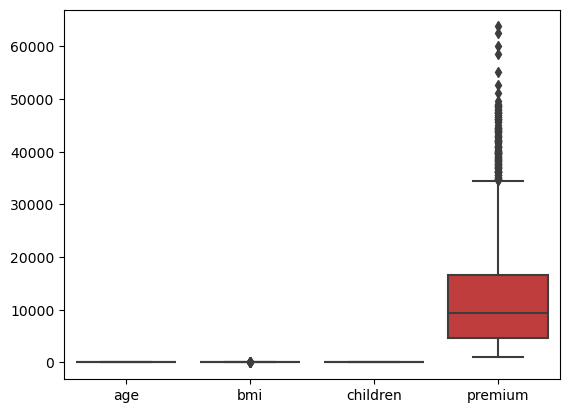

In [7]:
import seaborn as sns
sns.boxplot(data=df)

# Treatment of Outlier -- Winsorizing Technique

In [8]:
for i in df:                  # i = column name 
    if df[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = df[i].quantile(0.25)  # for 1 column compute q1
        q3 = df[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        df[i].clip(lower=ll,upper=ul,inplace=True)

<Axes: >

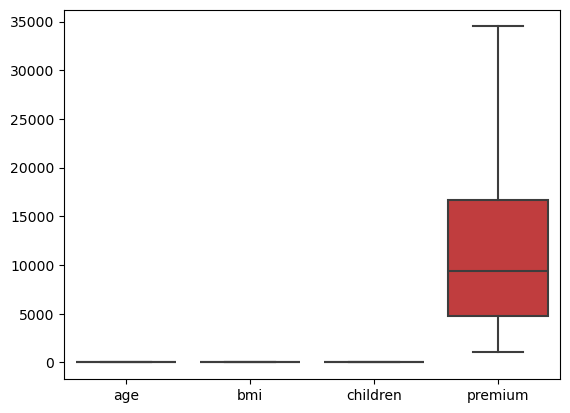

In [9]:
import seaborn as sns
sns.boxplot(data=df)

In [10]:
# #Employee Numeric columns
df_num = df.select_dtypes(include=[np.number])
df_num.head(3)

,age,bmi,children,premium
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46


In [11]:
df_dummies = df.select_dtypes(include=['object'])
df_dummies.head(3)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast


In [12]:
from sklearn.preprocessing import LabelEncoder

df_dummies = df_dummies.apply(LabelEncoder().fit_transform)
df_dummies.head(3)


,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2


In [13]:
df = pd.concat([df_num, df_dummies],axis=1)
df.head()

,age,bmi,children,premium,sex,smoker,region
0,19,27.9,0,16884.92,0,1,3
1,18,33.8,1,1725.55,1,0,2
2,28,33.0,3,4449.46,1,0,2
3,33,22.7,0,21984.47,1,0,1
4,32,28.9,0,3866.86,1,0,1


In [14]:
df.premium = np.sqrt(df.premium)
df.head()

,age,bmi,children,premium,sex,smoker,region
0,19,27.9,0,129.941987,0,1,3
1,18,33.8,1,41.539740,1,0,2
2,28,33.0,3,66.704273,1,0,2
3,33,22.7,0,148.271609,1,0,1
4,32,28.9,0,62.184082,1,0,1


# Data Partition

In [15]:
X = df.drop('premium', axis= 1)
y = df[['premium']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,random_state=134)

In [16]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

,premium,age,bmi,children,sex,smoker,region
234,81.915749,39,24.5,2,1,0,1
1016,52.050360,19,24.6,1,0,0,1
6,90.777695,46,33.4,1,0,0,2
79,81.061828,41,33.0,0,0,0,1
309,88.029313,41,33.1,2,0,0,1


# Model Builiding

In [17]:
Correlation = train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

C:\Users\Hp\AppData\Local\Temp\ipykernel_17888\3853582193.py:2: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')


,premium,age,bmi,children,sex,smoker,region
premium,1.000000,0.405569,0.148619,0.089628,0.051703,0.735183,-0.020805
age,0.405569,1.000000,0.124445,0.049127,0.000447,-0.030507,0.012153
bmi,0.148619,0.124445,1.000000,0.003821,0.050145,0.010526,0.180525
children,0.089628,0.049127,0.003821,1.000000,-0.002856,-0.010213,0.000438
sex,0.051703,0.000447,0.050145,-0.002856,1.000000,0.083907,-0.024294
smoker,0.735183,-0.030507,0.010526,-0.010213,0.083907,1.000000,0.004023
region,-0.020805,0.012153,0.180525,0.000438,-0.024294,0.004023,1.000000


Correlation 
* Resale & Horsepower have high impact on Price of Car


In [18]:
from sklearn.ensemble import RandomForestRegressor

Model3 = RandomForestRegressor(random_state=20,
                               n_estimators=25, # make 25 tress
                               criterion="squared_error")

Model3.fit(X_train, y_train)

C:\Users\Hp\AppData\Local\Temp\ipykernel_17888\3010396135.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Model3.fit(X_train, y_train)


RandomForestRegressor(n_estimators=25, random_state=20)

# Prediction on Train

In [19]:
import numpy as np
train['fitted_value'] = np.round(Model3.predict(X_train),2)
train['Residual'] = np.round(train.premium - train.fitted_value,2)
train

,premium,age,bmi,children,sex,smoker,region,fitted_value,Residual
234,81.915749,39,24.5,2,1,0,1,82.97,-1.05
1016,52.050360,19,24.6,1,0,0,1,52.05,0.00
6,90.777695,46,33.4,1,0,0,2,91.10,-0.32
79,81.061828,41,33.0,0,0,0,1,80.07,0.99
309,88.029313,41,33.1,2,0,0,1,87.19,0.84
...,...,...,...,...,...,...,...,...,...
1038,47.443018,22,28.9,0,1,0,0,52.61,-5.17
645,100.703227,48,30.8,3,1,0,0,102.48,-1.78
15,42.863038,19,24.6,1,1,0,3,43.59,-0.73
1202,45.335637,22,32.1,0,1,0,1,44.83,0.51


In [20]:
from sklearn.metrics import r2_score
r2 = r2_score(train.premium,train.fitted_value)
print('R2 score for model Performance on Train : ', np.round(r2,2)*100)

R2 score for model Performance on Train :  96.0


# Prediction on Test

In [21]:
test = pd.concat([y_test, X_test], axis=1)
test.head()

,premium,age,bmi,children,sex,smoker,region
894,116.425942,62,32.1,0,1,0,0
1041,41.288013,18,23.1,0,1,0,0
957,112.293767,24,26.8,1,1,0,1
45,143.632448,55,37.3,0,1,0,3
483,99.398541,51,39.5,1,0,0,3


In [22]:
import numpy as np
test['Prediction'] = np.round(Model3.predict(X_test),2)
test['Residual'] = np.round(test.premium - test.Prediction,2)
test.head()

,premium,age,bmi,children,sex,smoker,region,Prediction,Residual
894,116.425942,62,32.1,0,1,0,0,117.00,-0.57
1041,41.288013,18,23.1,0,1,0,0,44.11,-2.82
957,112.293767,24,26.8,1,1,0,1,55.91,56.38
45,143.632448,55,37.3,0,1,0,3,107.07,36.56
483,99.398541,51,39.5,1,0,0,3,99.25,0.15


# Comparision

In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(train.premium,train.fitted_value)
print('R2 score for model Performance on Train : ', np.round(r2,2)*100)

R2 score for model Performance on Train :  96.0


In [24]:
r2 = r2_score(test.premium,test.Prediction)
print('R2 score for model Performance on Test : ', np.round(r2,2)*100)

R2 score for model Performance on Test :  85.0


# Finished

# Model Export

In [25]:
import sklearn
sklearn.__version__

'1.2.2'

In [26]:
import pickle

pickle.dump(Model3, open(r"C:\Users\Hp\Desktop\Python Code\End_to_End Project\2.Insurance Premium -- Regression Task\build.pkl",'wb'))  #model = dt # Exporting model from python to laptop

In [27]:
X_train.head()

,age,bmi,children,sex,smoker,region
234,39,24.5,2,1,0,1
1016,19,24.6,1,0,0,1
6,46,33.4,1,0,0,2
79,41,33.0,0,0,0,1
309,41,33.1,2,0,0,1
